In [1]:
import numpy as np
from adaline import adaline
from pandas import DataFrame
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Testing adaline for simple liniar sepration

given a value from R^2, (x, y), is y > 1 ?

In [2]:
train_data = np.random.uniform(-100, 100, (1000, 2))
train_label = train_data[:,1] > 1

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,-92.7542,31.4349,True
1,-23.4832,-89.4899,False
2,-38.824,88.7147,True
3,-11.3828,-10.2,False
4,-73.521,-97.137,False
...,...,...,...
995,-16.4992,0.207589,False
996,87.9398,34.8707,True
997,19.5034,-14.4096,False
998,97.1744,-16.5052,False


In [3]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-3.36708402, 56.8600286 ])

In [4]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.98

In [5]:
test_data =  np.random.uniform(-100, 100, (1000, 2))
test_label = test_data[:,1] > 1

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.985

In [6]:
# preforms just as well on new data, perhaps a tiny bit worse

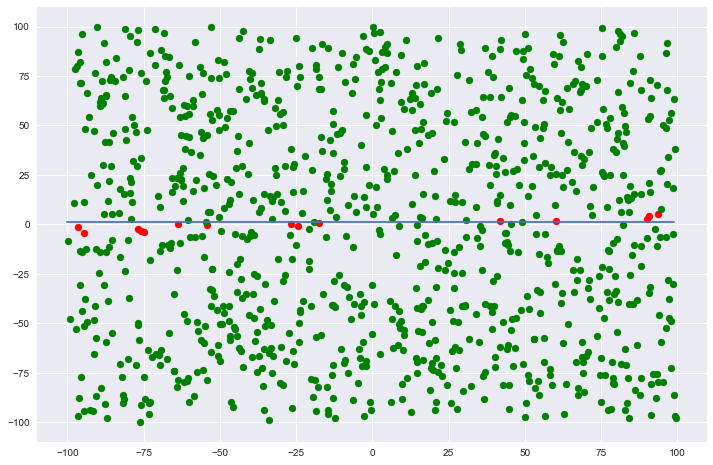

In [7]:
mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

In [8]:
# the angle/slope is a bit off

In [9]:
#does more data help?

train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before
train_label = train_data[:,1] > 1

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.994

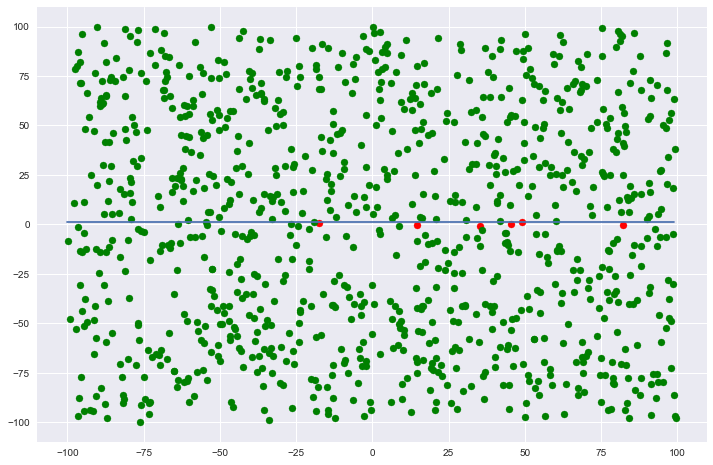

In [10]:
#seems like it

mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

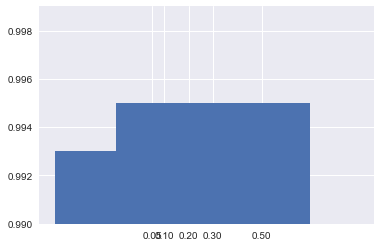

In [11]:
#what about different learning rates

scores = []

rates = [0.05, 0.1, 0.2, 0.3, 0.5]

for rate in rates:

    neuron = adaline(2, rate)

    history = neuron.train(train_data, train_label)

    pred = np.array([neuron.predict(i) for i in test_data])
    pred = pred >= 0.5

    scores.append(metrics.accuracy_score(test_label, pred))


plt.bar(rates, scores)
plt.xticks(rates)
plt.ylim([0.99,0.999])
plt.show()

In [12]:
#looks like somewhere in the middle is more relable

## Testing adaline for a more challenging task

given a value from R^2, (x, y).
does it setesfy: 4 <= x^2 + y^2 <= 9 ?

this equation describe a ring with raduises 2 and 3

In [13]:
# we'll have to decrease the posiable range of values to balance the data-set

train_data = np.random.uniform(-6, 6, (1000, 2))

small_circle = 4 <= train_data[:,0]**2 + train_data[:,1]**2
big_circle = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = small_circle & big_circle

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,4.38566,-1.23501,False
1,-4.25016,-5.59039,False
2,5.36488,-4.40985,False
3,-3.3665,-4.70563,False
4,-1.18644,4.69693,False
...,...,...,...
995,-0.141146,1.54362,False
996,-2.60492,0.259292,True
997,0.0253909,-4.82027,False
998,-0.975325,0.150537,False


In [14]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-0.32822734,  0.76113793])

In [15]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.487

In [16]:
# preforms poorly but is to be excpected since
# 1-neuron model can only learn linarly seprable
# classification problomes
# in fact its predictions are in part with simply geussing (around 0.5 correct predictions)


In [17]:
train_data = np.random.uniform(-6, 6, (30000, 2)) # 30 times as many dots as before

circle_small = 4 <= train_data[:,0]**2 + train_data[:,1]**2
circle_big = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = circle_small & circle_big

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5

metrics.accuracy_score(train_label, pred)

0.5003666666666666

In [18]:
test_data =  np.random.uniform(-6, 6, (1000, 2))

circle_small = 4 <= test_data[:,0]**2 + test_data[:,1]**2
circle_big = test_data[:,0]**2 + test_data[:,1]**2 <= 9

test_label = circle_small & circle_big

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.498

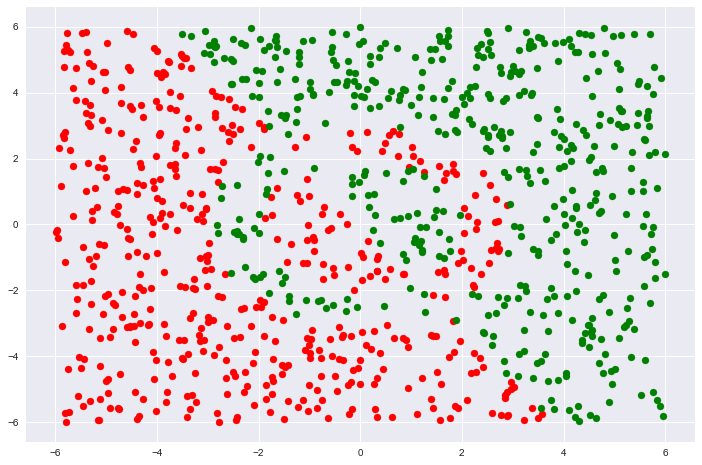

In [19]:
mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.show()

In [20]:
# we can see very clearly that the adaline tried to find a LINIAR inequalty
# to classefy the instances by which

### MultyLevelPreceptron - MLP
we'll now try a more powerfull model for this problome
a very simple form of a NerualNetwork

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
# the 2nd layer has 4 neurons because a ring is 4 dimentional
# meaning: it is defined  by 4 pharameters

# we use tanh as the activatin function because its very similar to
# sigmoid wich we are already familiar with in this project 

mlp = MLPClassifier(max_iter = 500, activation = 'tanh', hidden_layer_sizes = (6,4))

mlp.fit(train_data, train_label)

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 4), max_iter=500)

In [23]:
pred = mlp.predict(test_data)

metrics.accuracy_score(test_label, pred)

0.994

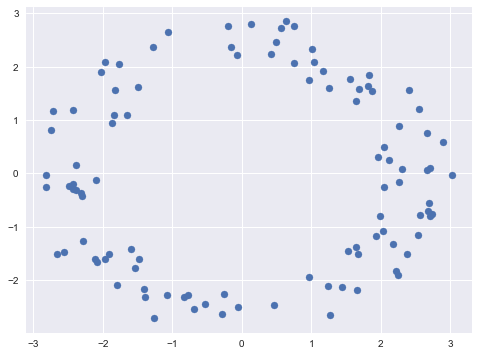

In [24]:
# almost no mistakes, lets view the dots it classefied correctly

posetive = test_data[np.where(pred == True)]

plt.figure(figsize = (8, 6))
plt.scatter(posetive[:, 0], posetive[:, 1])
plt.show()

In [25]:
# looks about right, next we'll attempt to plot the predictions each
# neuron in the net woud make if it would be the final stop
# it's view point of the data so to speak

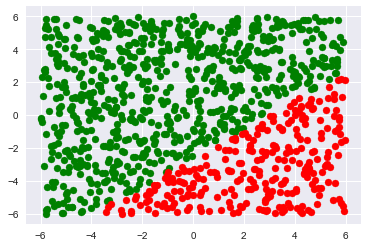

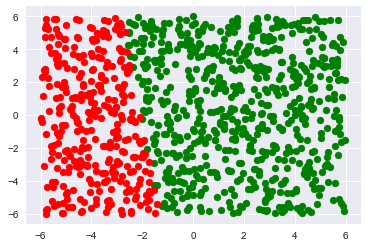

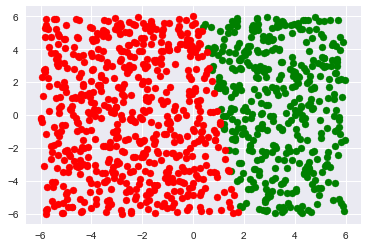

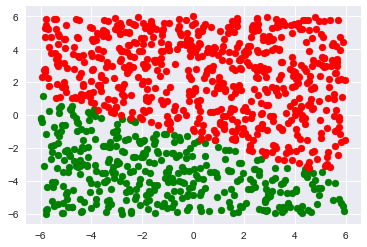

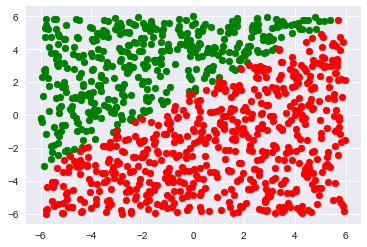

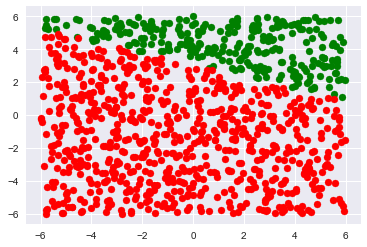

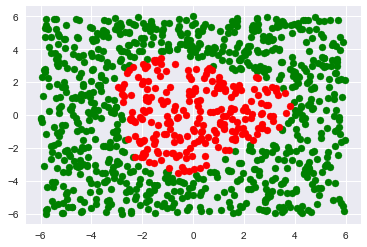

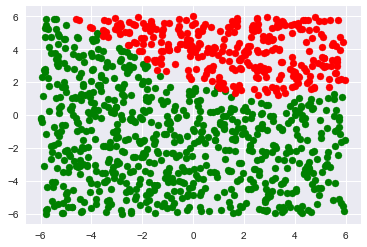

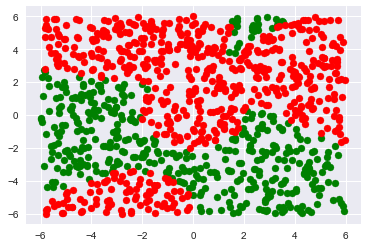

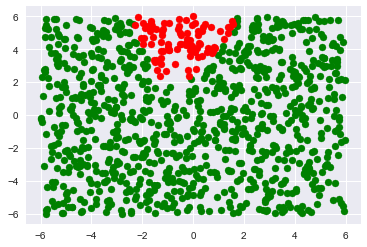

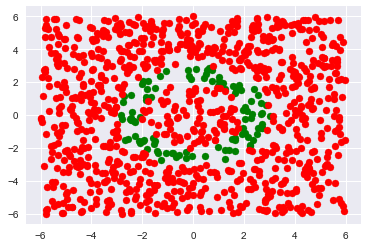

In [26]:
# so the code below will gather the nessery data for this task

data = test_data
preds = []

for layer_i in range(len(mlp.coefs_)):

    preds.append([])
    node_vectors = mlp.coefs_[layer_i].T

    for j in range(len(node_vectors)):
        preds[layer_i].append(np.tanh(data.dot(node_vectors[j]) + mlp.intercepts_[layer_i][j]))

    data = np.array(preds[layer_i]).T

for i in range(len(mlp.coefs_)):
    for node_i in range(len(mlp.coefs_[i].T)):

        n = preds[i][node_i]
        yes = n >= 0
        no =  n < 0
        
        plt.scatter(test_data[yes][:,0], test_data[yes][:,1], color = 'g')
        plt.scatter(test_data[no][:,0], test_data[no][:,1], color = 'r')
        plt.show()

In [49]:
# the last layer of the network is just like the adaline
# only the data it works with has been prossesed by the
# other layers, so a reasonable hypophasis would be:
# training an adaline on the data
# incripted by the hidden layers
# and trying to classfy with it the origonal data
# should work as well as the hole net.

incripted_data = np.array(preds[1]).T

In [50]:
neuron = adaline(4, 0.2)
history = neuron.train(incripted_data, test_label)

print(neuron.weights, '\n\n', mlp.coefs_[2].T)

[-0.70930624 -0.2522881   1.01429809 -0.22865558] 

 [[-15.48309962  -7.50320237  20.50098127  -3.46574768]]


In [51]:
pred = np.array([neuron.predict(i) for i in incripted_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.957

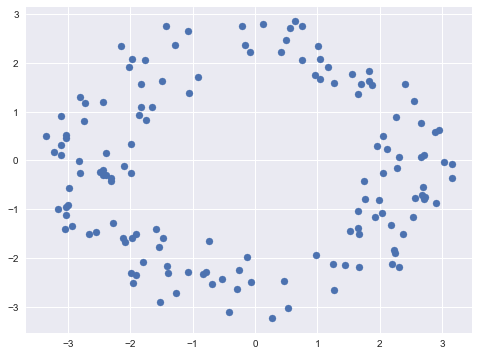

In [53]:
# it works!!!!!!

posetive = test_data[np.where(pred == True)]

plt.figure(figsize = (8, 6))
plt.scatter(posetive[:, 0], posetive[:, 1])
plt.show()

In [ ]:
# interstingly now this new adaline works with data of higher dimentions
# than the data it is tested upon